# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Archana Branch- https://github.com/archinarula/Group-5-Project/tree/Archana/Archana_WorkingFolder/Resources



# Dependencies and Load Data

In [1]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Import the combined data

In [2]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df_all= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


In [3]:
#Combined dataframe
print (Combined_df_all.shape)
Combined_df_all.head()


(886, 15)


,Reported_Date,City,is_newyork,Population,Data Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,1,18804000,'https://github.com/nychealth/coronavirus-data...,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [4]:
# Delete extraneous columns
Combined_df=Combined_df_all.drop(["Population","Data Source"], axis=1)
Combined_df.head()

,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,1,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,1,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,1,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


In [20]:
Combined_df.tail()

,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
881,2021-05-12,Sao Paulo,0,2808,2069,23.66,17.43,17.55,79.12,18.68,71.95,18.60,72.61
882,2021-05-13,Sao Paulo,0,2505,2084,21.10,17.56,15.76,84.46,18.21,73.98,18.49,72.63
883,2021-05-14,Sao Paulo,0,3248,2189,27.36,18.44,16.58,74.25,17.45,76.58,18.30,73.43
884,2021-05-15,Sao Paulo,0,2732,2294,23.02,19.33,17.32,77.08,17.35,75.77,18.25,73.45
885,2021-05-16,Sao Paulo,0,1544,2331,13.01,19.64,17.97,75.67,17.45,75.74,18.23,73.77


In [5]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Reported_Date                 886 non-null    datetime64[ns]
 1   City                          886 non-null    object        
 2   is_newyork                    886 non-null    int64         
 3   New_Cases                     886 non-null    int64         
 4   mavg_7day_new_cases           886 non-null    int64         
 5   new_cases_per_100K            886 non-null    float64       
 6   mavg_7day_per_100k_new_cases  886 non-null    float64       
 7   daily_temp                    886 non-null    float64       
 8   daily_humidity                886 non-null    float64       
 9   mavg_7_temp                   886 non-null    float64       
 10  mavg_7_humidity               886 non-null    float64       
 11  mavg_15_temp                  88

In [6]:
import warnings
warnings.filterwarnings("ignore")

# CORRELATION- Both Cities combined

Both Cities-all variables

<AxesSubplot:>

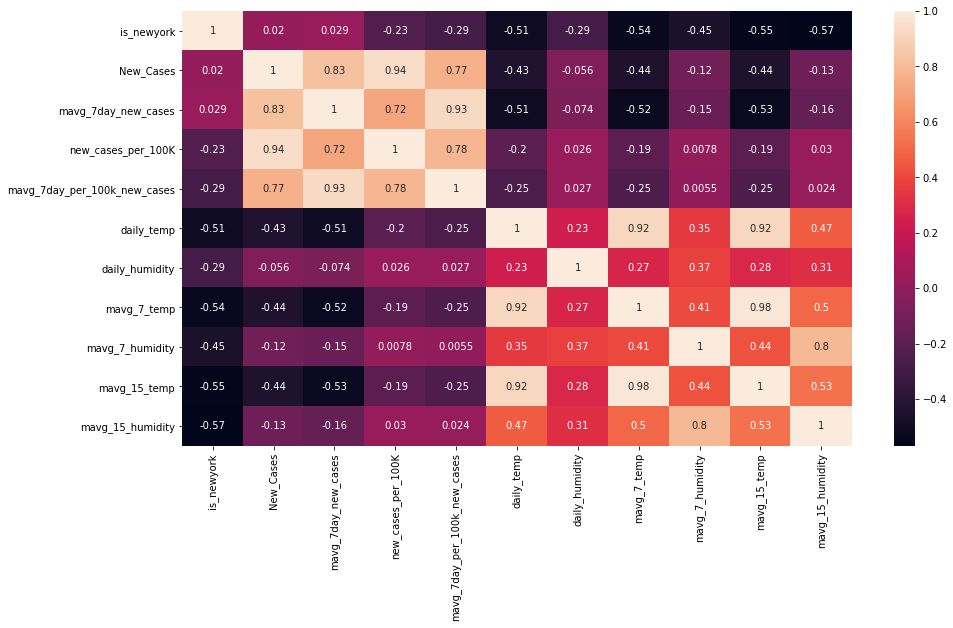

In [21]:
# Let us get the correlation in the data using Seaborn Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(Combined_df.corr("spearman"), annot = True)

In [8]:
# Correlation using Spearman correlation test 
Combined_df.corr(method='spearman').style.background_gradient('viridis')

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
is_newyork,1.000000,-0.011910,-0.044103,-0.213573,-0.288617,-0.456258,-0.253671,-0.469837,-0.468191,-0.472229,-0.606774
New_Cases,-0.011910,1.000000,0.851241,0.973197,0.804309,-0.402953,-0.048287,-0.406767,-0.128609,-0.419424,-0.151052
mavg_7day_new_cases,-0.044103,0.851241,1.000000,0.818863,0.952097,-0.444558,-0.053006,-0.447524,-0.138495,-0.459027,-0.165183
new_cases_per_100K,-0.213573,0.973197,0.818863,1.000000,0.836401,-0.265403,0.006722,-0.266514,-0.021672,-0.279694,-0.014818
mavg_7day_per_100k_new_cases,-0.288617,0.804309,0.952097,0.836401,1.000000,-0.256094,0.018290,-0.252566,0.000301,-0.262260,0.017082
daily_temp,-0.456258,-0.402953,-0.444558,-0.265403,-0.256094,1.000000,0.149263,0.902912,0.345019,0.883987,0.506404
daily_humidity,-0.253671,-0.048287,-0.053006,0.006722,0.018290,0.149263,1.000000,0.236298,0.285408,0.239906,0.268408
mavg_7_temp,-0.469837,-0.406767,-0.447524,-0.266514,-0.252566,0.902912,0.236298,1.000000,0.364308,0.967381,0.510836
mavg_7_humidity,-0.468191,-0.128609,-0.138495,-0.021672,0.000301,0.345019,0.285408,0.364308,1.000000,0.412771,0.751286
mavg_15_temp,-0.472229,-0.419424,-0.459027,-0.279694,-0.262260,0.883987,0.239906,0.967381,0.412771,1.000000,0.536320


In [22]:
# Correlation using Pearson correlation test 
Combined_df.corr(method='pearson').style.background_gradient('viridis')

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
is_newyork,1.000000,0.019609,0.029013,-0.231577,-0.285716,-0.508187,-0.285429,-0.536695,-0.454351,-0.551442,-0.568475
New_Cases,0.019609,1.000000,0.826235,0.943144,0.765858,-0.428471,-0.056464,-0.437505,-0.115217,-0.441120,-0.126540
mavg_7day_new_cases,0.029013,0.826235,1.000000,0.721887,0.925973,-0.512532,-0.074202,-0.522927,-0.145513,-0.527506,-0.163655
new_cases_per_100K,-0.231577,0.943144,0.721887,1.000000,0.781777,-0.197697,0.026219,-0.193974,0.007834,-0.193804,0.029638
mavg_7day_per_100k_new_cases,-0.285716,0.765858,0.925973,0.781777,1.000000,-0.252470,0.027067,-0.248166,0.005512,-0.247617,0.024025
daily_temp,-0.508187,-0.428471,-0.512532,-0.197697,-0.252470,1.000000,0.234358,0.918352,0.353325,0.915021,0.465967
daily_humidity,-0.285429,-0.056464,-0.074202,0.026219,0.027067,0.234358,1.000000,0.273285,0.369528,0.282226,0.310569
mavg_7_temp,-0.536695,-0.437505,-0.522927,-0.193974,-0.248166,0.918352,0.273285,1.000000,0.406237,0.980290,0.499563
mavg_7_humidity,-0.454351,-0.115217,-0.145513,0.007834,0.005512,0.353325,0.369528,0.406237,1.000000,0.435145,0.795100
mavg_15_temp,-0.551442,-0.441120,-0.527506,-0.193804,-0.247617,0.915021,0.282226,0.980290,0.435145,1.000000,0.531525


In [23]:
# Correlation using Kendall correlation test 
Combined_df.corr(method='kendall').style.background_gradient('viridis')

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
is_newyork,1.000000,-0.009735,-0.036039,-0.174566,-0.235876,-0.372833,-0.207322,-0.383943,-0.382576,-0.385897,-0.495840
New_Cases,-0.009735,1.000000,0.677544,0.883414,0.632451,-0.278572,-0.032668,-0.285607,-0.085136,-0.300163,-0.100218
mavg_7day_new_cases,-0.036039,0.677544,1.000000,0.627769,0.858598,-0.308149,-0.033681,-0.310703,-0.092997,-0.327709,-0.106098
new_cases_per_100K,-0.174566,0.883414,0.627769,1.000000,0.665449,-0.185966,0.003960,-0.190303,-0.014902,-0.204145,-0.008498
mavg_7day_per_100k_new_cases,-0.235876,0.632451,0.858598,0.665449,1.000000,-0.178378,0.012230,-0.176736,-0.001416,-0.191759,0.012397
daily_temp,-0.372833,-0.278572,-0.308149,-0.185966,-0.178378,1.000000,0.086536,0.726489,0.219463,0.701249,0.335266
daily_humidity,-0.207322,-0.032668,-0.033681,0.003960,0.012230,0.086536,1.000000,0.155298,0.196049,0.160219,0.187798
mavg_7_temp,-0.383943,-0.285607,-0.310703,-0.190303,-0.176736,0.726489,0.155298,1.000000,0.224440,0.847562,0.335782
mavg_7_humidity,-0.382576,-0.085136,-0.092997,-0.014902,-0.001416,0.219463,0.196049,0.224440,1.000000,0.257390,0.569072
mavg_15_temp,-0.385897,-0.300163,-0.327709,-0.204145,-0.191759,0.701249,0.160219,0.847562,0.257390,1.000000,0.346969


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [12]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NewCases100K = Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity", "is_newyork"]]
print (NewCases100K.shape)
NewCases100K.head()

(886, 5)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity,is_newyork
0,2020-02-29,0.01,3.50,56.27,1
1,2020-03-01,0.00,3.43,55.59,1
2,2020-03-02,0.00,3.82,55.35,1
3,2020-03-03,0.01,4.19,54.40,1
4,2020-03-04,0.03,4.58,55.59,1


In [13]:
# Spearman correlation test 
NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity,is_newyork
new_cases_per_100K,1.000000,-0.279694,-0.014818,-0.213573
mavg_15_temp,-0.279694,1.000000,0.536320,-0.472229
mavg_15_humidity,-0.014818,0.536320,1.000000,-0.606774
is_newyork,-0.213573,-0.472229,-0.606774,1.000000


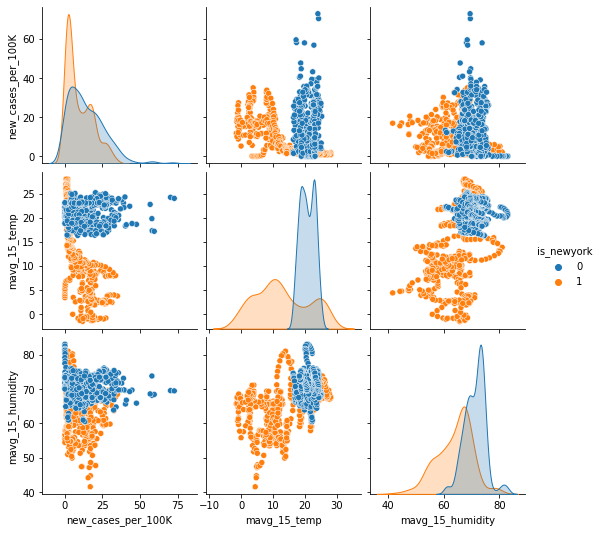

In [14]:
#Pair Plotting to see relationship

PP_NewCases100K= sns.pairplot(data=NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'], hue="is_newyork")

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [16]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

MAVG7NewCases100K = Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity',"is_newyork"]]
print (MAVG7NewCases100K.shape)
MAVG7NewCases100K.head()

(886, 5)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity,is_newyork
0,2020-02-29,0.0,3.50,56.27,1
1,2020-03-01,0.0,3.43,55.59,1
2,2020-03-02,0.0,3.82,55.35,1
3,2020-03-03,0.0,4.19,54.40,1
4,2020-03-04,0.0,4.58,55.59,1


In [17]:
# Spearman correlation test 
MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity,is_newyork
mavg_7day_per_100k_new_cases,1.000000,-0.262260,0.017082,-0.288617
mavg_15_temp,-0.262260,1.000000,0.536320,-0.472229
mavg_15_humidity,0.017082,0.536320,1.000000,-0.606774
is_newyork,-0.288617,-0.472229,-0.606774,1.000000


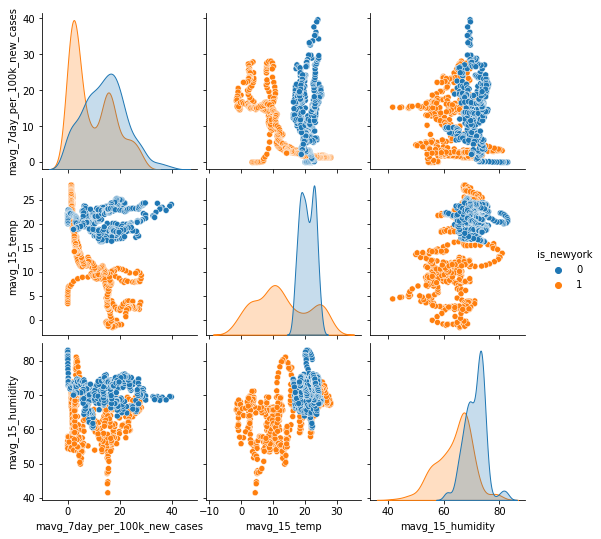

In [19]:
#Pair Plotting to see relationship
PP_MAVG7NewCases100K = sns.pairplot(data=MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'], hue="is_newyork")

# Correlation- New York Only (Combined Data) 


In [15]:
#extract only NY data
NY_Combined_df = Combined_df.loc[Combined_df['City']=='New York']
print (NY_Combined_df.shape)
NY_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2020-02-29,New York,1,0,0.01,0.0,0.40,44.08,5.70,58.96,3.50,56.27
1,2020-03-01,New York,0,0,0.00,0.0,-0.10,45.71,5.39,59.61,3.43,55.59
2,2020-03-02,New York,0,0,0.00,0.0,6.61,52.25,4.49,61.09,3.82,55.35
3,2020-03-03,New York,1,0,0.01,0.0,11.27,70.72,4.32,61.56,4.19,54.40
4,2020-03-04,New York,5,0,0.03,0.0,10.21,58.76,4.69,60.67,4.58,55.59


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [16]:
#extract relevant coloumns to check the relations- NY new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NY_NewCases100K = NY_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (NY_NewCases100K.shape)
NY_NewCases100K.head()

(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.50,56.27
1,2020-03-01,0.00,3.43,55.59
2,2020-03-02,0.00,3.82,55.35
3,2020-03-03,0.01,4.19,54.40
4,2020-03-04,0.03,4.58,55.59


In [17]:
# Spearman correlation test 
NY_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,-0.790203,-0.249525
mavg_15_temp,-0.790203,1.000000,0.380293
mavg_15_humidity,-0.249525,0.380293,1.000000


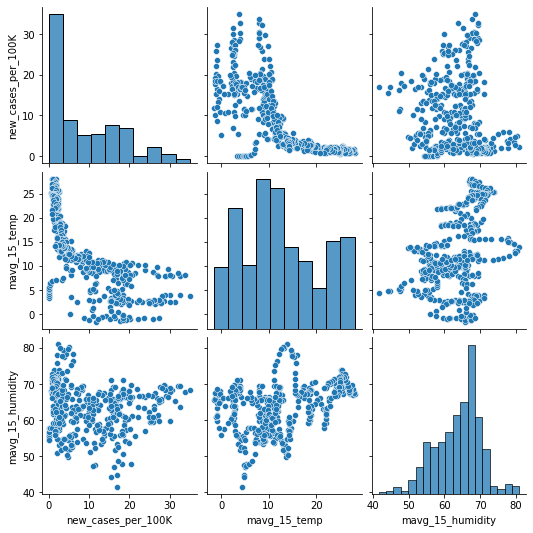

In [18]:
#Pair Plotting to see relationship

#PP_NY_NewCases_dailyTH = sns.pairplot(data=NY_NewCases_dailyTH, y_vars=['New_Cases'],x_vars=['daily_temp', 'daily_humidity'])

PP_NY_NewCases100K= sns.pairplot(data=NY_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [19]:
#extract relevant coloumns to check the relations- NY Moving 7 days Avgs

NY_MAVG7NewCases100K = NY_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (NY_MAVG7NewCases100K.shape)
NY_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.0,3.50,56.27
1,2020-03-01,0.0,3.43,55.59
2,2020-03-02,0.0,3.82,55.35
3,2020-03-03,0.0,4.19,54.40
4,2020-03-04,0.0,4.58,55.59


In [20]:
# Spearman correlation test 
NY_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,-0.806549,-0.247778
mavg_15_temp,-0.806549,1.000000,0.380293
mavg_15_humidity,-0.247778,0.380293,1.000000


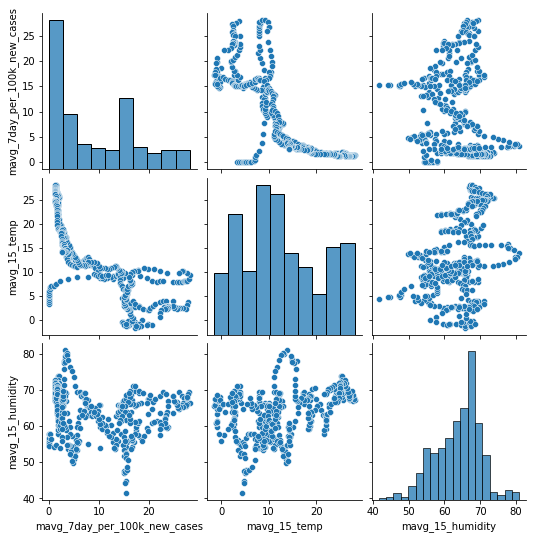

In [21]:
#Pair Plotting to see relationship

#PP_NY_MAVG7NewCases_TH = sns.pairplot(data=NY_MAVG7NewCases_TH, y_vars=['mavg_7day_new_cases'],x_vars=['mavg_7_temp', 'mavg_7_humidity'])

PP_NY_MAVG7NewCases100K = sns.pairplot(data=NY_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Correlation- Sau Paulo Only (Combined Data)

In [22]:
#extract only SP data
SP_Combined_df = Combined_df.loc[Combined_df['City']=='Sao Paulo']
print (SP_Combined_df.shape)
SP_Combined_df.head()

(443, 12)


,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2020-02-29,Sao Paulo,0,0,0.00,0.0,20.47,85.96,20.22,83.51,22.21,80.34
444,2020-03-01,Sao Paulo,0,0,0.00,0.0,19.50,85.50,20.37,83.58,22.16,80.81
445,2020-03-02,Sao Paulo,0,0,0.00,0.0,19.61,85.81,20.49,84.47,21.90,81.65
446,2020-03-03,Sao Paulo,0,0,0.00,0.0,19.17,85.53,20.32,85.33,21.61,82.19
447,2020-03-04,Sao Paulo,1,0,0.01,0.0,19.61,79.08,19.79,85.83,21.24,82.76


New Cases Per 100K with MAVG 15 days Temp and Humidity

In [23]:
#extract relevant coloumns to check the relations- SP new_cases_per_100K with mavg_15_temp and mavg_15_humidity

SP_NewCases100K = SP_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (SP_NewCases100K.shape)
SP_NewCases100K.head()


(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.00,22.21,80.34
444,2020-03-01,0.00,22.16,80.81
445,2020-03-02,0.00,21.90,81.65
446,2020-03-03,0.00,21.61,82.19
447,2020-03-04,0.01,21.24,82.76


In [24]:
# Spearman correlation test 
SP_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,0.031699,-0.108985
mavg_15_temp,0.031699,1.000000,0.229871
mavg_15_humidity,-0.108985,0.229871,1.000000


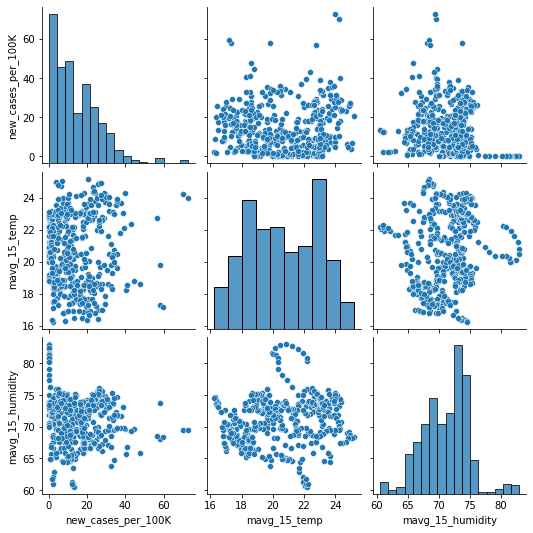

In [25]:
#Pair Plotting to see relationship

PP_SP_NewCases100K= sns.pairplot(data=SP_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [26]:
#extract relevant coloumns to check the relations- SP mavg_7day_per_100k_new_cases with mavg_15_temp and mavg_15_humidity

SP_MAVG7NewCases100K = SP_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (SP_MAVG7NewCases100K.shape)
SP_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.0,22.21,80.34
444,2020-03-01,0.0,22.16,80.81
445,2020-03-02,0.0,21.90,81.65
446,2020-03-03,0.0,21.61,82.19
447,2020-03-04,0.0,21.24,82.76


In [27]:
# Spearman correlation test 
SP_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,0.052446,-0.115080
mavg_15_temp,0.052446,1.000000,0.229871
mavg_15_humidity,-0.115080,0.229871,1.000000


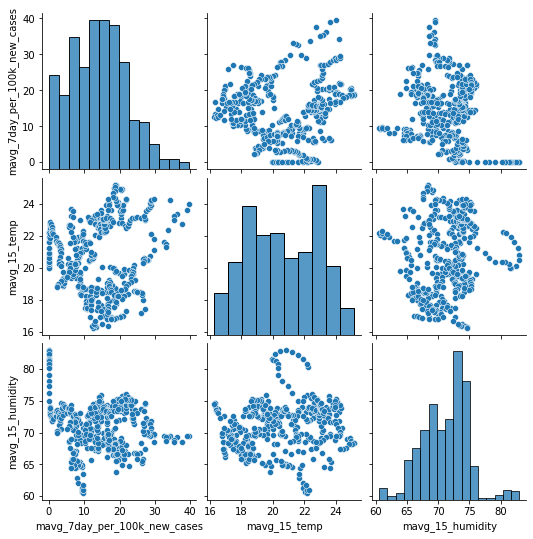

In [28]:
#Pair Plotting to see relationship

PP_SP_MAVG7NewCases100K= sns.pairplot(data=SP_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])